In [40]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_test = [train, test]


#Feature Engineering
for dataset in train_test:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    dataset.drop('SibSp', axis=1, inplace=True)
    dataset.drop('Parch', axis=1, inplace=True)
    dataset['IsChild'] = dataset['Age']<=12
    
#train['Name']
#train.info()


In [41]:
#Filling missing values
for dataset in train_test:
    dataset['Age'].fillna(dataset.groupby('Sex')['Age'].transform('mean'), inplace=True)
    dataset['Embarked'].fillna('S', inplace=True)
    dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('mean'), inplace=True)


#Converting to numeric values
gender_dict = {'male':0, 'female':1}
embarked_dict = {'S':0, 'C':1, 'Q':2}
cabin_dict = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}

for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map(gender_dict)
    dataset['Embarked'] = dataset['Embarked'].map(embarked_dict)    

#Filling missing values
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    dataset['Cabin'] = dataset['Cabin'].map(cabin_dict)
    dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

train = train.drop(['PassengerId','Ticket'], axis=1)
test = test.drop('Ticket', axis=1)

train_X = train.drop('Survived', axis=1)
train_Y = train['Survived']

train_test = [train_X, test]
#train.isnull().sum()
#test.isnull().sum()
for dataset in train_test:
    dataset['Age'] = pd.cut(dataset.Age, bins=[0,10,20,30,40,50,60,70,80,200],labels=[1,2,3,4,5,6,7,8,9])
    dataset['Age'] = pd.to_numeric(dataset['Age'])


#titles=set()
#for name in combined['Name']:
 #   titles.add(name.split(",")[1].split(".")[0].strip())


Title_Dictionary = {
    "Capt": 1,
    "Col": 1,
    "Major": 1,
    "Jonkheer": 2,
    "Don": 2,
    "Sir" : 2,
    "Dr": 1,
    "Rev": 1,
    "the Countess":2,
    "Mme": 3,
    "Mlle": 4,
    "Ms": 3,
    "Mr" : 4,
    "Mrs" : 3,
    "Miss" : 3,
    "Master" : 5,
    "Lady" : 2,
    "Dona" : 2
}

for dataset in train_test:
    dataset['Title'] = dataset['Name'].map(lambda name:name.split(",")[1].split(".")[0].strip())
    dataset['Title'] = dataset['Title'].map(Title_Dictionary)
    dataset.drop('Name',1,inplace=True)

test.isnull().sum()
#train_X['Age']
#test.info()
#print(titles)

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
IsChild        0
Title          0
dtype: int64

In [42]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked=True, figsize = (10,5) )

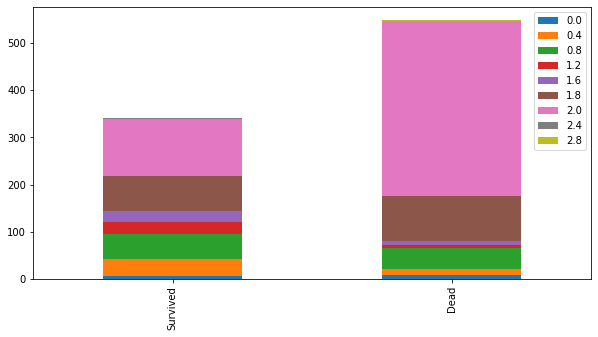

In [43]:
bar_chart('Cabin')

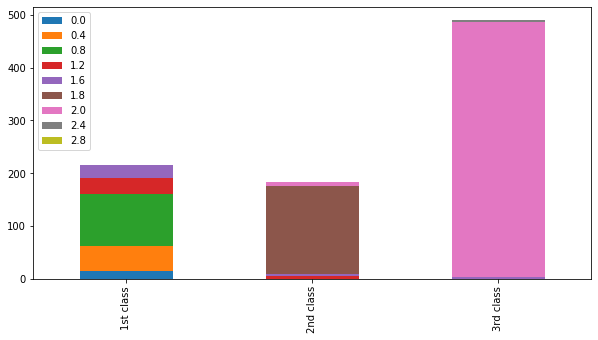

In [44]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [45]:
drop_col = ['Fare']
train_X = train_X.drop(drop_col,axis=1)
test = test.drop(drop_col,axis=1)

In [46]:
#print(train_X.shape)
#print(test_X.shape)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Cabin          418 non-null float64
Embarked       418 non-null int64
FamilySize     418 non-null int64
IsChild        418 non-null bool
Title          418 non-null int64
dtypes: bool(1), float64(1), int64(7)
memory usage: 26.6 KB


In [47]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = KNeighborsClassifier(n_neighbors=9)
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

80.36

In [48]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

80.92

In [49]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

80.13

In [50]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)


77.55

In [51]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

82.15

In [52]:
clf=LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

80.59

In [53]:
#print(test_X)
#Testing
#clf = RandomForestClassifier(n_estimators=13)
clf = SVC()
clf.fit(train_X, train_Y)
test_X = test.drop('PassengerId', axis=1)
#print(test_X)
test_Y = clf.predict(test_X)
#print(test_Y)

submission = pd.DataFrame({'PassengerId' : test['PassengerId'], 
                           'Survived' : test_Y
                          })
submission.to_csv('submission.csv', index=False)

submission_file = pd.read_csv('submission.csv')


C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
#print(submission_file)
print(train_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
Cabin         891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null int64
IsChild       891 non-null bool
Title         891 non-null int64
dtypes: bool(1), float64(1), int64(6)
memory usage: 49.7 KB
None


In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
model.add(Dense(7, input_dim=8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))




#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history = model.fit(train_X, train_Y, epochs=1000, batch_size=64)

Epoch 1/1000
891/891 [==============================] - 0s 21us/step - loss: 1.3357 - acc: 0.5152
Epoch 2/1000
891/891 [==============================] - 0s 33us/step - loss: 1.0197 - acc: 0.5477
Epoch 3/1000
891/891 [==============================] - 0s 21us/step - loss: 0.9413 - acc: 0.5870
Epoch 4/1000
891/891 [==============================] - 0s 18us/step - loss: 0.8596 - acc: 0.5993
Epoch 5/1000
891/891 [==============================] - 0s 30us/step - loss: 0.8293 - acc: 0.6083
Epoch 6/1000
891/891 [==============================] - 0s 32us/step - loss: 0.8069 - acc: 0.6150
Epoch 7/1000
891/891 [==============================] - 0s 24us/step - loss: 0.7893 - acc: 0.6218
Epoch 8/1000
891/891 [==============================] - 0s 19us/step - loss: 0.7745 - acc: 0.6296
Epoch 9/1000
891/891 [==============================] - 0s 26us/step - loss: 0.7632 - acc: 0.6420
Epoch 10/1000
891/891 [==============================] - 0s 26us/step - loss: 0.7496 - acc: 0.6521
Epoch 11/1000
891/8

891/891 [==============================] - 0s 19us/step - loss: 0.4119 - acc: 0.8272
Epoch 84/1000
891/891 [==============================] - 0s 18us/step - loss: 0.4114 - acc: 0.8260
Epoch 85/1000
891/891 [==============================] - 0s 17us/step - loss: 0.4117 - acc: 0.8249
Epoch 86/1000
891/891 [==============================] - 0s 20us/step - loss: 0.4143 - acc: 0.8182
Epoch 87/1000
891/891 [==============================] - 0s 18us/step - loss: 0.4122 - acc: 0.8283
Epoch 88/1000
891/891 [==============================] - 0s 19us/step - loss: 0.4111 - acc: 0.8260
Epoch 89/1000
891/891 [==============================] - 0s 22us/step - loss: 0.4106 - acc: 0.8260
Epoch 90/1000
891/891 [==============================] - 0s 21us/step - loss: 0.4103 - acc: 0.8272
Epoch 91/1000
891/891 [==============================] - 0s 17us/step - loss: 0.4106 - acc: 0.8249
Epoch 92/1000
891/891 [==============================] - 0s 21us/step - loss: 0.4097 - acc: 0.8260
Epoch 93/1000
891/891 [=

891/891 [==============================] - 0s 33us/step - loss: 0.4024 - acc: 0.8249
Epoch 166/1000
891/891 [==============================] - 0s 27us/step - loss: 0.4020 - acc: 0.8305
Epoch 167/1000
891/891 [==============================] - 0s 20us/step - loss: 0.4014 - acc: 0.8227
Epoch 168/1000
891/891 [==============================] - 0s 25us/step - loss: 0.4013 - acc: 0.8272
Epoch 169/1000
891/891 [==============================] - 0s 30us/step - loss: 0.4027 - acc: 0.8283
Epoch 170/1000
891/891 [==============================] - 0s 27us/step - loss: 0.4010 - acc: 0.8283
Epoch 171/1000
891/891 [==============================] - 0s 24us/step - loss: 0.4011 - acc: 0.8249
Epoch 172/1000
891/891 [==============================] - 0s 28us/step - loss: 0.4013 - acc: 0.8272
Epoch 173/1000
891/891 [==============================] - 0s 27us/step - loss: 0.4008 - acc: 0.8283
Epoch 174/1000
891/891 [==============================] - 0s 32us/step - loss: 0.4005 - acc: 0.8283
Epoch 175/1000


891/891 [==============================] - 0s 28us/step - loss: 0.3942 - acc: 0.8260
Epoch 248/1000
891/891 [==============================] - 0s 21us/step - loss: 0.3957 - acc: 0.8260
Epoch 249/1000
891/891 [==============================] - 0s 28us/step - loss: 0.3956 - acc: 0.8305
Epoch 250/1000
891/891 [==============================] - 0s 24us/step - loss: 0.3947 - acc: 0.8272
Epoch 251/1000
891/891 [==============================] - 0s 25us/step - loss: 0.3939 - acc: 0.8272
Epoch 252/1000
891/891 [==============================] - 0s 27us/step - loss: 0.3957 - acc: 0.8339
Epoch 253/1000
891/891 [==============================] - 0s 22us/step - loss: 0.3948 - acc: 0.8316
Epoch 254/1000
891/891 [==============================] - 0s 26us/step - loss: 0.3942 - acc: 0.8272
Epoch 255/1000
891/891 [==============================] - 0s 29us/step - loss: 0.3947 - acc: 0.8305
Epoch 256/1000
891/891 [==============================] - 0s 33us/step - loss: 0.3953 - acc: 0.8249
Epoch 257/1000


891/891 [==============================] - 0s 20us/step - loss: 0.3912 - acc: 0.8305
Epoch 330/1000
891/891 [==============================] - 0s 25us/step - loss: 0.3911 - acc: 0.8339
Epoch 331/1000
891/891 [==============================] - 0s 27us/step - loss: 0.3914 - acc: 0.8328
Epoch 332/1000
891/891 [==============================] - 0s 22us/step - loss: 0.3923 - acc: 0.8294
Epoch 333/1000
891/891 [==============================] - 0s 20us/step - loss: 0.3917 - acc: 0.8328
Epoch 334/1000
891/891 [==============================] - 0s 19us/step - loss: 0.3914 - acc: 0.8316
Epoch 335/1000
891/891 [==============================] - 0s 25us/step - loss: 0.3918 - acc: 0.8316
Epoch 336/1000
891/891 [==============================] - 0s 30us/step - loss: 0.3930 - acc: 0.8260
Epoch 337/1000
891/891 [==============================] - 0s 43us/step - loss: 0.3911 - acc: 0.8350
Epoch 338/1000
891/891 [==============================] - 0s 43us/step - loss: 0.3919 - acc: 0.8328
Epoch 339/1000


891/891 [==============================] - 0s 20us/step - loss: 0.3898 - acc: 0.8283
Epoch 412/1000
891/891 [==============================] - 0s 32us/step - loss: 0.3906 - acc: 0.8283
Epoch 413/1000
891/891 [==============================] - 0s 28us/step - loss: 0.3920 - acc: 0.8204
Epoch 414/1000
891/891 [==============================] - 0s 29us/step - loss: 0.3904 - acc: 0.8249
Epoch 415/1000
891/891 [==============================] - 0s 27us/step - loss: 0.3896 - acc: 0.8260
Epoch 416/1000
891/891 [==============================] - 0s 27us/step - loss: 0.3892 - acc: 0.8260
Epoch 417/1000
891/891 [==============================] - 0s 22us/step - loss: 0.3893 - acc: 0.8227
Epoch 418/1000
891/891 [==============================] - 0s 19us/step - loss: 0.3893 - acc: 0.8283
Epoch 419/1000
891/891 [==============================] - 0s 28us/step - loss: 0.3887 - acc: 0.8260
Epoch 420/1000
891/891 [==============================] - 0s 23us/step - loss: 0.3897 - acc: 0.8249
Epoch 421/1000


891/891 [==============================] - 0s 21us/step - loss: 0.3888 - acc: 0.8260
Epoch 494/1000
891/891 [==============================] - 0s 24us/step - loss: 0.3893 - acc: 0.8260
Epoch 495/1000
891/891 [==============================] - 0s 26us/step - loss: 0.3883 - acc: 0.8294
Epoch 496/1000
891/891 [==============================] - 0s 28us/step - loss: 0.3881 - acc: 0.8283
Epoch 497/1000
891/891 [==============================] - 0s 25us/step - loss: 0.3883 - acc: 0.8316
Epoch 498/1000
891/891 [==============================] - 0s 39us/step - loss: 0.3884 - acc: 0.8260
Epoch 499/1000
891/891 [==============================] - 0s 47us/step - loss: 0.3885 - acc: 0.8249
Epoch 500/1000
891/891 [==============================] - 0s 40us/step - loss: 0.3899 - acc: 0.8238
Epoch 501/1000
891/891 [==============================] - 0s 36us/step - loss: 0.3884 - acc: 0.8294
Epoch 502/1000
891/891 [==============================] - 0s 40us/step - loss: 0.3899 - acc: 0.8249
Epoch 503/1000


891/891 [==============================] - 0s 40us/step - loss: 0.3883 - acc: 0.8272
Epoch 576/1000
891/891 [==============================] - 0s 48us/step - loss: 0.3875 - acc: 0.8249
Epoch 577/1000
891/891 [==============================] - 0s 56us/step - loss: 0.3867 - acc: 0.8361
Epoch 578/1000
891/891 [==============================] - 0s 46us/step - loss: 0.3873 - acc: 0.8305
Epoch 579/1000
891/891 [==============================] - 0s 53us/step - loss: 0.3904 - acc: 0.8238
Epoch 580/1000
891/891 [==============================] - 0s 43us/step - loss: 0.3907 - acc: 0.8339
Epoch 581/1000
891/891 [==============================] - 0s 43us/step - loss: 0.3909 - acc: 0.8283
Epoch 582/1000
891/891 [==============================] - 0s 47us/step - loss: 0.3891 - acc: 0.8272
Epoch 583/1000
891/891 [==============================] - 0s 37us/step - loss: 0.3872 - acc: 0.8283
Epoch 584/1000
891/891 [==============================] - 0s 42us/step - loss: 0.3870 - acc: 0.8316
Epoch 585/1000


891/891 [==============================] - 0s 27us/step - loss: 0.3852 - acc: 0.8339
Epoch 658/1000
891/891 [==============================] - 0s 31us/step - loss: 0.3856 - acc: 0.8339
Epoch 659/1000
891/891 [==============================] - 0s 23us/step - loss: 0.3864 - acc: 0.8328
Epoch 660/1000
891/891 [==============================] - 0s 27us/step - loss: 0.3857 - acc: 0.8305
Epoch 661/1000
891/891 [==============================] - 0s 20us/step - loss: 0.3854 - acc: 0.8316
Epoch 662/1000
891/891 [==============================] - 0s 27us/step - loss: 0.3858 - acc: 0.8316
Epoch 663/1000
891/891 [==============================] - 0s 23us/step - loss: 0.3846 - acc: 0.8339
Epoch 664/1000
891/891 [==============================] - 0s 19us/step - loss: 0.3862 - acc: 0.8260
Epoch 665/1000
891/891 [==============================] - 0s 22us/step - loss: 0.3850 - acc: 0.8328
Epoch 666/1000
891/891 [==============================] - 0s 24us/step - loss: 0.3850 - acc: 0.8316
Epoch 667/1000


891/891 [==============================] - 0s 23us/step - loss: 0.3857 - acc: 0.8339
Epoch 740/1000
891/891 [==============================] - 0s 28us/step - loss: 0.3841 - acc: 0.8294
Epoch 741/1000
891/891 [==============================] - 0s 24us/step - loss: 0.3848 - acc: 0.8305
Epoch 742/1000
891/891 [==============================] - 0s 24us/step - loss: 0.3852 - acc: 0.8272
Epoch 743/1000
891/891 [==============================] - 0s 27us/step - loss: 0.3832 - acc: 0.8350
Epoch 744/1000
891/891 [==============================] - 0s 23us/step - loss: 0.3838 - acc: 0.8305
Epoch 745/1000
891/891 [==============================] - 0s 22us/step - loss: 0.3830 - acc: 0.8373
Epoch 746/1000
891/891 [==============================] - 0s 29us/step - loss: 0.3834 - acc: 0.8316
Epoch 747/1000
891/891 [==============================] - 0s 22us/step - loss: 0.3843 - acc: 0.8328
Epoch 748/1000
891/891 [==============================] - 0s 21us/step - loss: 0.3837 - acc: 0.8305
Epoch 749/1000


891/891 [==============================] - 0s 27us/step - loss: 0.3837 - acc: 0.8294
Epoch 822/1000
891/891 [==============================] - 0s 24us/step - loss: 0.3845 - acc: 0.8227
Epoch 823/1000
891/891 [==============================] - 0s 25us/step - loss: 0.3841 - acc: 0.8283
Epoch 824/1000
891/891 [==============================] - 0s 19us/step - loss: 0.3843 - acc: 0.8272
Epoch 825/1000
891/891 [==============================] - 0s 28us/step - loss: 0.3828 - acc: 0.8316
Epoch 826/1000
891/891 [==============================] - 0s 24us/step - loss: 0.3847 - acc: 0.8283
Epoch 827/1000
891/891 [==============================] - 0s 18us/step - loss: 0.3843 - acc: 0.8350
Epoch 828/1000
891/891 [==============================] - 0s 18us/step - loss: 0.3833 - acc: 0.8283
Epoch 829/1000
891/891 [==============================] - 0s 21us/step - loss: 0.3850 - acc: 0.8227
Epoch 830/1000
891/891 [==============================] - 0s 32us/step - loss: 0.3829 - acc: 0.8305
Epoch 831/1000


891/891 [==============================] - 0s 39us/step - loss: 0.3825 - acc: 0.8316
Epoch 904/1000
891/891 [==============================] - 0s 30us/step - loss: 0.3826 - acc: 0.8305
Epoch 905/1000
891/891 [==============================] - 0s 35us/step - loss: 0.3813 - acc: 0.8294
Epoch 906/1000
891/891 [==============================] - 0s 32us/step - loss: 0.3830 - acc: 0.8294
Epoch 907/1000
891/891 [==============================] - 0s 30us/step - loss: 0.3827 - acc: 0.8305
Epoch 908/1000
891/891 [==============================] - 0s 24us/step - loss: 0.3836 - acc: 0.8294
Epoch 909/1000
891/891 [==============================] - 0s 37us/step - loss: 0.3832 - acc: 0.8283
Epoch 910/1000
891/891 [==============================] - 0s 41us/step - loss: 0.3835 - acc: 0.8305
Epoch 911/1000
891/891 [==============================] - 0s 37us/step - loss: 0.3825 - acc: 0.8283
Epoch 912/1000
891/891 [==============================] - 0s 34us/step - loss: 0.3827 - acc: 0.8283
Epoch 913/1000


891/891 [==============================] - 0s 19us/step - loss: 0.3818 - acc: 0.8316
Epoch 986/1000
891/891 [==============================] - 0s 26us/step - loss: 0.3818 - acc: 0.8316
Epoch 987/1000
891/891 [==============================] - 0s 23us/step - loss: 0.3833 - acc: 0.8294
Epoch 988/1000
891/891 [==============================] - 0s 18us/step - loss: 0.3823 - acc: 0.8283
Epoch 989/1000
891/891 [==============================] - 0s 21us/step - loss: 0.3824 - acc: 0.8283
Epoch 990/1000
891/891 [==============================] - 0s 23us/step - loss: 0.3815 - acc: 0.8294
Epoch 991/1000
891/891 [==============================] - 0s 25us/step - loss: 0.3826 - acc: 0.8294
Epoch 992/1000
891/891 [==============================] - 0s 27us/step - loss: 0.3824 - acc: 0.8305
Epoch 993/1000
891/891 [==============================] - 0s 26us/step - loss: 0.3823 - acc: 0.8294
Epoch 994/1000
891/891 [==============================] - 0s 29us/step - loss: 0.3828 - acc: 0.8305
Epoch 995/1000


In [63]:
test_Y = clf.predict(test_X)
#print(test_Y)

submission = pd.DataFrame({'PassengerId' : test['PassengerId'], 
                           'Survived' : test_Y
                          })
submission.to_csv('submission.csv', index=False)

submission_file = pd.read_csv('submission.csv')